<a href="https://colab.research.google.com/github/tirumanagirisivasai/Deep-Learning-lab-Programs/blob/main/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(xtrain,ytrain), (xtest, ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
print(xtrain.shape)

(50000, 32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
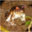

In [7]:
xtrain[0]

In [8]:
xtrain[0].shape

(32, 32, 3)

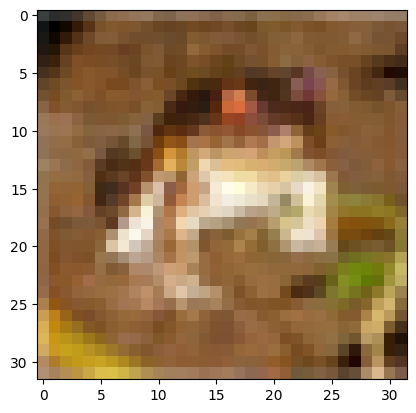

In [6]:
plt.imshow(xtrain[0])

In [9]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [19]:
print(ytrain[0][0])

6


##***Visualizing the images in the dataset***

<Figure size 5000x5000 with 0 Axes>

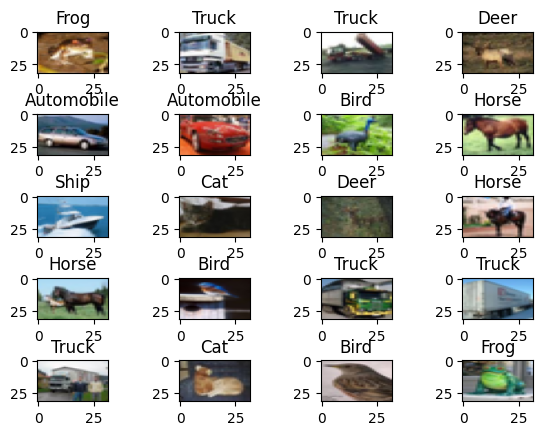

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
fig, axs = plt.subplots(5, 4)
plt.subplots_adjust(wspace=1.0, hspace=1.0)
images = 20

for i in range(images):
    ax = axs[i // 4, i % 4]  # Accessing the appropriate subplot
    ax.set_title(labels[ytrain[i][0]])  # Assuming 'labels' is a list or array of labels
    ax.imshow(xtrain[i], aspect='auto')

plt.show()


In [35]:
X_train = xtrain.astype('float32')
X_test = xtest.astype('float32')

In [36]:
X_train/=255
X_test/=255

#***Histogram Equilization***

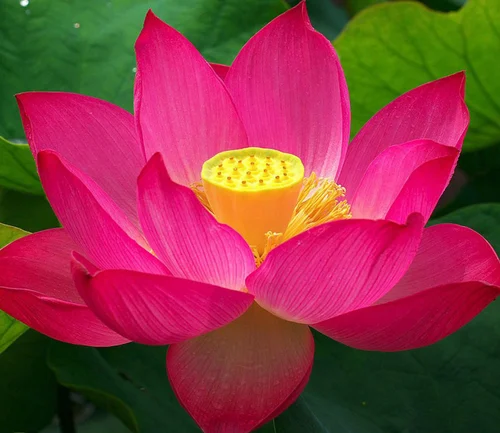

In [101]:
from google.colab.patches import cv2_imshow
import cv2
image_new = cv2.imread('/content/drive/MyDrive/dl_lab_datasets/flower.jpg')
cv2_imshow(image_new)
image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2GRAY)


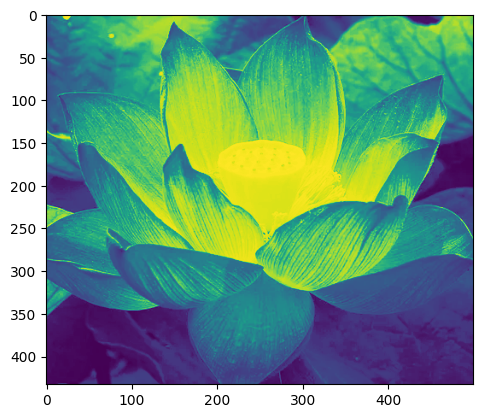

In [102]:
equ = cv2.equalizeHist(image_new)
plt.imshow(equ)

#***Data Augmentation***

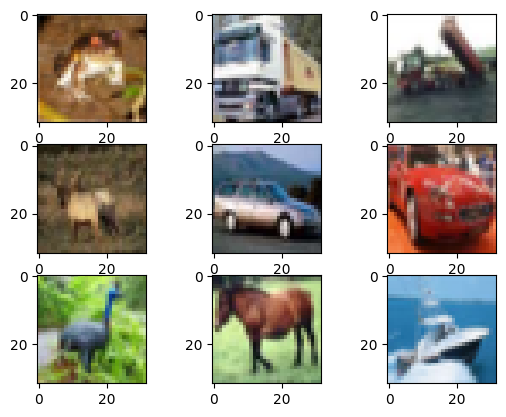

In [48]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrain[i])
plt.show()

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)
datagen.fit(X_train)

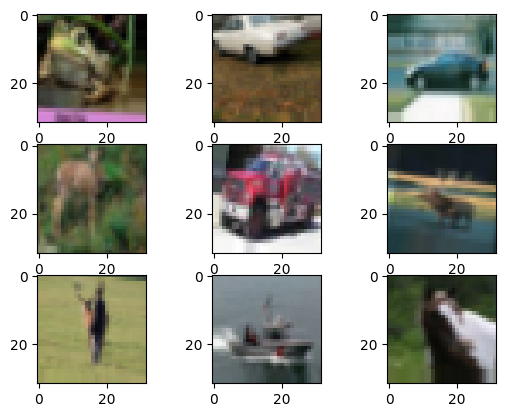

In [52]:
for X_batch, y_batch in datagen.flow(xtrain, ytrain, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

##***Thresholding***

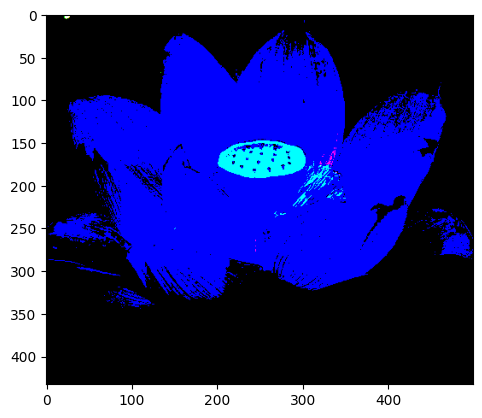

In [60]:
image = cv2.imread('/content/drive/MyDrive/dl_lab_datasets/flower.jpg')
threshold_value = 200
max_pixels = 255
ret, image = cv2.threshold(image, threshold_value, max_pixels, cv2.THRESH_BINARY)
plt.imshow(image)

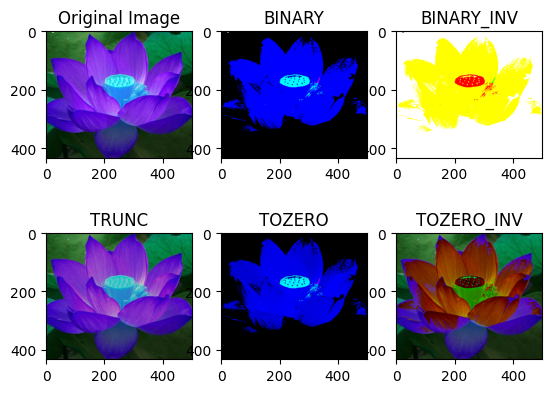

In [64]:
image1 = cv2.imread('/content/drive/MyDrive/dl_lab_datasets/flower.jpg')
threshold_value = 200
max_pixels = 255
ret, image2 = cv2.threshold(image1, threshold_value, max_pixels, cv2.THRESH_BINARY)
ret, image3 = cv2.threshold(image1, threshold_value, max_pixels, cv2.THRESH_BINARY_INV)
ret, image4 = cv2.threshold(image1, threshold_value, max_pixels, cv2.THRESH_TRUNC)
ret, image5 = cv2.threshold(image1, threshold_value, max_pixels, cv2.THRESH_TOZERO)
ret, image6 = cv2.threshold(image1, threshold_value, max_pixels, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
img_arr = [image1, image2, image3, image4, image5, image6]

figure, axes = plt.subplots(2,3)
total = len(img_arr)

for i in range(len(img_arr)):
  ax = axes[i//3,i%3]
  ax.set_title(titles[i])
  ax.imshow(img_arr[i])#plt.imshow(image)

plt.show()

#***Edge Detection***

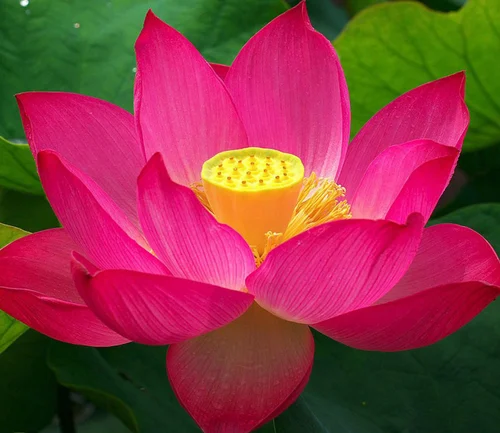

In [90]:
from google.colab.patches import cv2_imshow
image_edge = cv2.imread('/content/drive/MyDrive/dl_lab_datasets/flower.jpg')
cv2_imshow(image_edge)

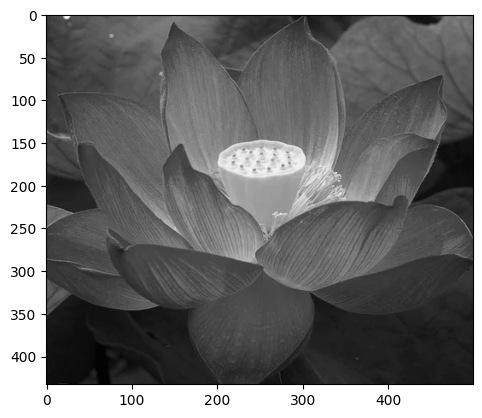

In [91]:
gray_image = cv2.cvtColor(image_edge, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

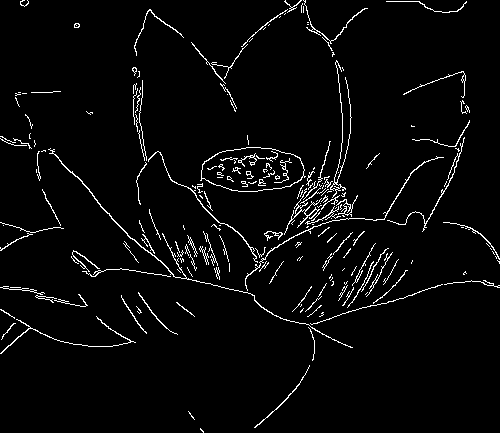

In [92]:
edges_image = cv2.Canny(gray_image, threshold1=100, threshold2=170)
cv2_imshow(edges_image)